<a href="https://colab.research.google.com/github/rajeevfromkrec/deep_learning/blob/master/kaggle_data_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
!pwd

/content


In [0]:
basedir='/content'

In [0]:
!wget https://www.kaggle.com/c/dogs-vs-cats/data?select=train.zip

--2020-05-24 16:14:17--  https://www.kaggle.com/c/dogs-vs-cats/data?select=train.zip
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data?select=train.zip’

data?select=train.z     [ <=>                ]  38.39K  --.-KB/s    in 0.1s    

2020-05-24 16:14:17 (270 KB/s) - ‘data?select=train.zip’ saved [39316]



In [0]:
!pip install kaggle

In [0]:
!mkdir .kaggle

In [0]:
import json
token = {"username":"rajeevranjankrec","key":"5e8e081c0d2d711641f31c7629e1f703"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)



In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

- path is now set to: {/content}
ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-05-20 17:23:43          70872  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          10200  
mrmorj/political-advertisements-from-facebook               Political Advertisements from Facebook              237MB  2020-05-05 18:53:51            398  
susuwatari/epa-vehicle-dataset-19802021                     EPA Vehicle Dataset (~1980-2021)                      2MB  2020-05-10 18:20:19            399  
idoyo92/epl-stats-20192020     

In [0]:
!kaggle datasets download -d chetankv/dogs-cats-images -p /content/

 96% 419M/435M [00:05<00:00, 123MB/s] 
100% 435M/435M [00:05<00:00, 76.2MB/s]


In [0]:
!ls

dogs-cats-images.zip  sample_data


In [0]:
import zipfile

zfile = zipfile.ZipFile('dogs-cats-images.zip')
zfile.extractall('/content')

In [0]:
!ls ./dataset/training_set/cats

cat.1000.jpg  cat.1721.jpg  cat.2441.jpg  cat.3161.jpg	cat.3882.jpg
cat.1001.jpg  cat.1722.jpg  cat.2442.jpg  cat.3162.jpg	cat.3883.jpg
cat.1002.jpg  cat.1723.jpg  cat.2443.jpg  cat.3163.jpg	cat.3884.jpg
cat.1003.jpg  cat.1724.jpg  cat.2444.jpg  cat.3164.jpg	cat.3885.jpg
cat.1004.jpg  cat.1725.jpg  cat.2445.jpg  cat.3165.jpg	cat.3886.jpg
cat.1005.jpg  cat.1726.jpg  cat.2446.jpg  cat.3166.jpg	cat.3887.jpg
cat.1006.jpg  cat.1727.jpg  cat.2447.jpg  cat.3167.jpg	cat.3888.jpg
cat.1007.jpg  cat.1728.jpg  cat.2448.jpg  cat.3168.jpg	cat.3889.jpg
cat.1008.jpg  cat.1729.jpg  cat.2449.jpg  cat.3169.jpg	cat.388.jpg
cat.1009.jpg  cat.172.jpg   cat.244.jpg   cat.316.jpg	cat.3890.jpg
cat.100.jpg   cat.1730.jpg  cat.2450.jpg  cat.3170.jpg	cat.3891.jpg
cat.1010.jpg  cat.1731.jpg  cat.2451.jpg  cat.3171.jpg	cat.3892.jpg
cat.1011.jpg  cat.1732.jpg  cat.2452.jpg  cat.3172.jpg	cat.3893.jpg
cat.1012.jpg  cat.1733.jpg  cat.2453.jpg  cat.3173.jpg	cat.3894.jpg
cat.1013.jpg  cat.1734.jpg  cat.2454.jpg  cat.3174

In [0]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [0]:
folder='/content/dataset/training_set/cats'

FileNotFoundError: ignored

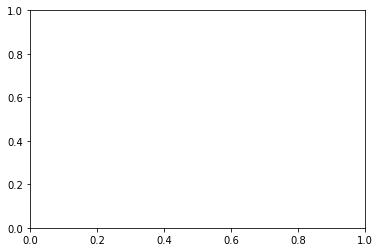

In [0]:
for i in range(9):
  plt.subplot()
  filename=folder+'cat.'+str(i)+'.jpg'
  image=imread(filename)
  pyplot.imshow(image)

pyplot.show()


In [0]:
# Hyperparams
IMAGE_SIZE = 200
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 20
BATCH_SIZE = 32
TEST_SIZE = 30

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [0]:

# Data augmentation
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)



In [0]:
training_data_dir='./dataset/training_set/'

In [0]:
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")

Found 8000 images belonging to 2 classes.


In [0]:
test_data_dir= './dataset/test_set/'

In [0]:
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

Found 2000 images belonging to 2 classes.


In [0]:
type(test_generator)

keras.preprocessing.image.DirectoryIterator

In [0]:
test_generator.shape

AttributeError: ignored

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger


In [0]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2d(32,3,3,padding='same', input_shape=input_shape,activation='relu'),
                                  tf.keras.layers.Conv2d(32,3,3,padding='same',activation='relu'),
                                  tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

                                  tf.keras.layers.Conv2d(64,3,3,padding='same',activation='relu'),
                                  tf.keras.layers.Conv2d(64,3,3,padding='same',activation='relu'),
                                  tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

                                  tf.keras.layers.Conv2d(128,3,3,padding='same',activation='relu'),
                                  tf.keras.layers.Conv2d(128,3,3,padding='same',activation='relu'),
                                  tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

                                  tf.keras.layers.Conv2d(256,3,3,padding='same',activation='relu'),
                                  tf.keras.layers.Conv2d(256,3,3,padding='same',activation='relu'),
                                  tf.keras.layers.MaxPool2D(pool_size=(2, 2)),                                  

                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(256,activation='relu'),
                                  tf.keras.layers.Dropout(0.5)

                                  tf.keras.layers.Dense(256,activation='relu'),
                                  tf.keras.layers.Dropout(0.5)

                                  tf.keras.layers.Dense(1,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid'),


])

model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 

In [0]:
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS)

Epoch 1/20
250/250 [==============================] - 2140s 9s/step - loss: 0.6768 - accuracy: 0.5537
Epoch 2/20
 41/250 [===>..........................] - ETA: 29:46 - loss: 0.6508 - accuracy: 0.6029